In [56]:
import cv2
import skimage
import scipy.stats
from mpmath import *

import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import numpy as np

In [181]:
def see(img,g=False):
    if(g):
        img=skimage.color.rgb2gray(img)
        plt.imshow(img,cmap=plt.cm.gray)
        plt.show()
    else:
        plt.imshow(img)
        plt.show()
        
def gray(img):
    img2=skimage.color.rgb2gray(img)
    return img2

In [57]:
c1 = plt.imread('images/c1.jpg')
c2 = plt.imread('images/c2.jpg')
c3 = plt.imread('images/c3.jpg')

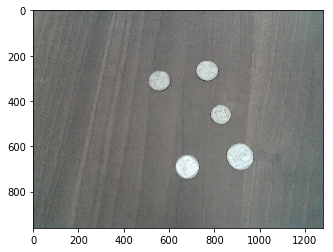

In [58]:
plt.imshow(c3[:,:,:])
plt.show()


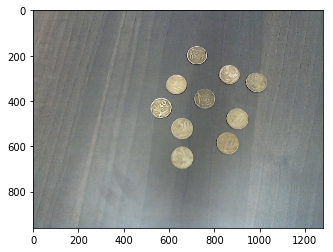

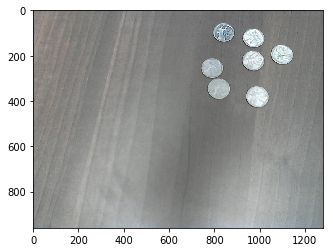

In [59]:
plt.imshow(c2)
plt.show()
plt.imshow(c1)

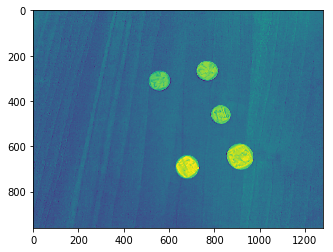

In [60]:
plt.imshow(c3[:,:,1])
plt.show()

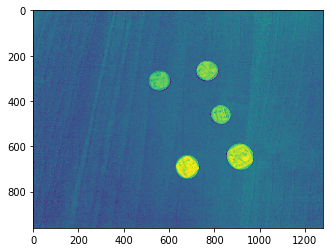

In [61]:
plt.imshow(c3[:,:,2])
plt.show()

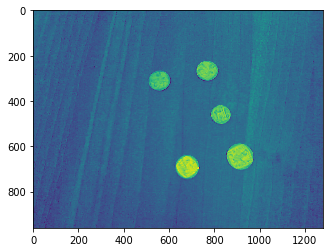

In [62]:
plt.imshow(c3[:,:,0])
plt.show()

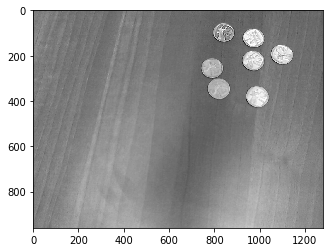

In [79]:
grayc1 = skimage.color.rgb2gray(c1)
plt.imshow(grayc1,cmap=plt.cm.gray)

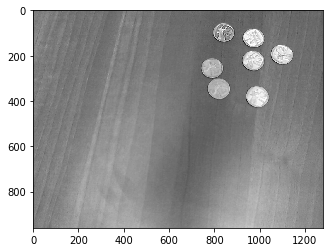

In [83]:
see(c1,True)

In [84]:
grayc2 = skimage.color.rgb2gray(c2)


In [85]:
grayc3= skimage.color.rgb2gray(c3)


In [86]:
hsv_c1=skimage.color.rgb2hsv(c1)

/home/avi/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:275: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = (arr[idx, 1] - arr[idx, 2]) / delta[idx]
/home/avi/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:279: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 2. + (arr[idx, 2] - arr[idx, 0]) / delta[idx]
/home/avi/anaconda3/lib/python3.7/site-packages/skimage/color/colorconv.py:283: RuntimeWarning: divide by zero encountered in true_divide
  out[idx, 0] = 4. + (arr[idx, 0] - arr[idx, 1]) / delta[idx]


In [87]:
hsv_c2=skimage.color.rgb2hsv(c2)

In [88]:
hsv_c3=skimage.color.rgb2hsv(c3)

# Descriptive Statistics
for image c2

## 1. & 2. What is the width and height of the image?

In [94]:
print("Width:")
print(c2.shape[1])

print()
print("Height:")
print(c2.shape[0])

Width:
1280

Height:
960


## 3. How many pixels are in the image in total?

In [101]:
print("Pixels = width x height")
print("=", c2.shape[0]*c2.shape[1])

Pixels = width x height
= 1228800


## 4. How many black pixels are there in the mask?
## &
## 5. How many white pixels are there in the mask?

In [144]:
mask2=plt.imread('images/m2.png')
print(mask2.shape)
# see(mask2[:,:,:])

# count all black pixels (i.e all pixels with value = 0):
z = np.unique(mask2[:,:,:],return_counts=True)
print(z)
print("[pixel value | frequency]")
print("[   ",z[0][0],"  | " ,z[1][0],"]   (black)")
print("[   ",z[0][1],"  | " ,z[1][1],"]   (white)")


(960, 1280, 4)
(array([0., 1.], dtype=float32), array([3471312, 1443888]))
[pixel value | frequency]
[    0.0   |  3471312 ]   (black)
[    1.0   |  1443888 ]   (white)


# Using the greyscale version of the image...

## 6. what is the minimum pixel value in the image?
## &
## 7. what is the maximum pixel value in the image?

In [152]:
# min pixel value:
min_pix = np.min(grayc2)
max_pix = np.max(grayc2)
print("minimum pixel value: ", min_pix)
print("maximum pixel value: ", max_pix)

minimum pixel value:  0.06323607843137255
maximum pixel value:  0.9943450980392158


## 8. what are the minimum and maximum pixel values of the coin pixels?

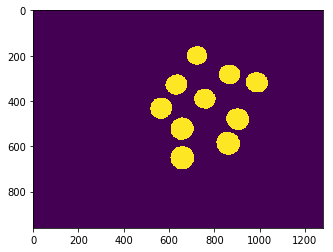

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [258]:
# 1. Extract coins:
blkcoins=skimage.filters.threshold_otsu(mask2[:,:,0])
binary=mask2[:,:,0]>blkcoins
see(binary)
binary

In [260]:
# Get locations of coins from binarised mask (this will correspond to the locations in the grayscale image)
i, j = np.where(binary == True)
print(grayc2[i,j])
coins=grayc2[i,j]

[0.53137608 0.54342353 0.54567843 ... 0.41707804 0.41343922 0.41343922]


In [273]:
# get max and min:
# min pixel value:
minc_pix = np.min(coins)
maxc_pix = np.max(coins)
print("minimum gray coin pixel value: ", minc_pix)
print("maximum gray coin pixel value: ", maxc_pix)

minimum gray coin pixel value:  0.06323607843137255
maximum gray coin pixel value:  0.731756862745098


## 9. what are the minimum and maximum pixel values of the desk pixels?

In [278]:
# Get locations of desk from binarised mask (this will correspond to the locations in the grayscale image)
k, l = np.where(binary == False)
print(grayc2[k,l])
desk=grayc2[k,l]

[0.46409922 0.46017765 0.45261725 ... 0.48131216 0.46562588 0.45386118]


In [265]:
# get max and min:
# min pixel value:
mind_pix = np.min(desk)
maxd_pix = np.max(desk)
print("minimum gray desk pixel value: ", mind_pix)
print("maximum gray desk pixel value: ", maxd_pix)

minimum gray desk pixel value:  0.06323607843137255
maximum gray desk pixel value:  0.731756862745098


## 10. what is the mean pixel intensity in the image?

In [271]:
print(grayc2.shape)
mean = np.mean(grayc2)
print("mean pixel intensity in grayscale image: ",mean)

(960, 1280)
mean pixel intensity in grayscale image:  0.49821575327531425


## 11. what is the mean brightness of the coin pixels?

### Richard is trolling. Brightness and intensity are the same (they are both equal to the pixel value) for greyscale images.

## 12. what is the mean brightness of the desk pixels?
### Richard is trolling. See answers for 8 and 9

## 13. what is the variance in the brightness for coin pixels?

In [275]:

# we got coins in question 8

variance_coins=np.var(coins)

print(variance_coins)

0.004900005294526545


## 14. what is the variance in the brightness for desk pixels?

In [279]:

# we got the desk in question 9

variance_desk=np.var(desk)

print(variance_desk)

0.004900005294526545


## 15. display a histogram of the red pixel intensities in the image

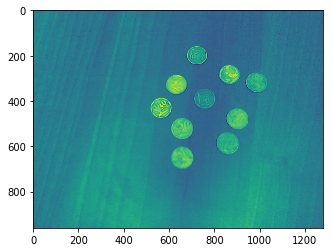

In [284]:
# red pixels
see(c2[:,:,0])
# not very red...

In [290]:
red=c2[:,:,0]


(960, 1280)


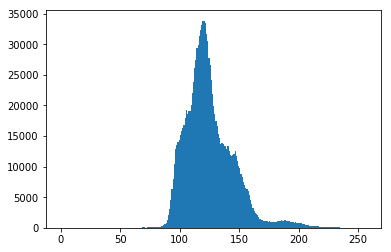

In [305]:
# fuck seaborn, use skimage

# np.histogram(red, bins=100)
plt.hist(red.flatten(), 256, range=(0,256));

## 16. display a histogram of the green pixel intensities in the image

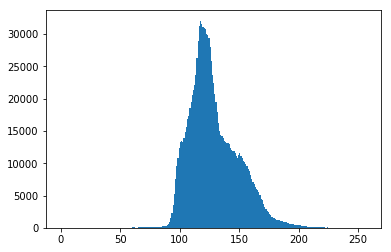

In [307]:
green=c2[:,:,1]
plt.hist(green.flatten(), 256, range=(0,256));

## 17. display a histogram of the blue pixel intensities in the image

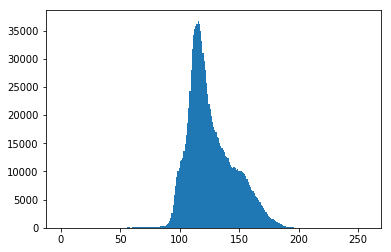

In [308]:
blue=c2[:,:,2]
plt.hist(blue.flatten(), 256, range=(0,256));

In [309]:
## 18. repeat the previous 3 steps for one of the mask images

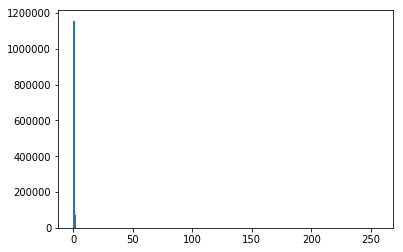

In [312]:
redm=mask2[:,:,0]
plt.hist(redm.flatten(), 256, range=(0,256));

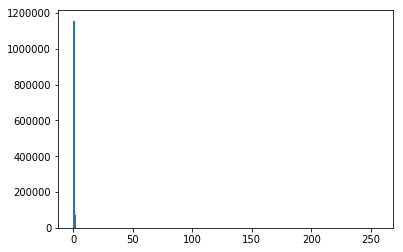

In [313]:
greenm=mask2[:,:,1]
plt.hist(greenm.flatten(), 256, range=(0,256));

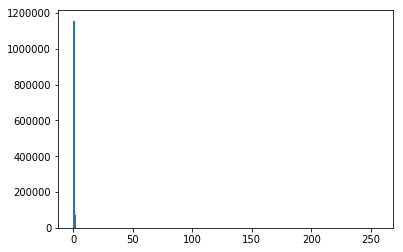

In [319]:
bluem=mask2[:,:,2]
plt.hist(bluem.flatten(), 256, range=(0,256));

## 19. display a histogram of the pixel intensities of all pixels in the image (across all channels)

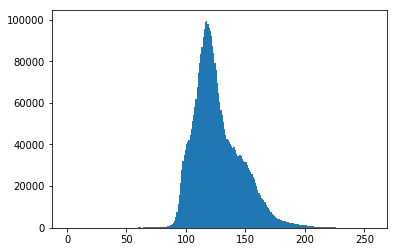

In [320]:
plt.hist(c2.flatten(), 256, range=(0,256));

## 20. display a histogram of the pixel intensities of the pixels in the greyscale image.

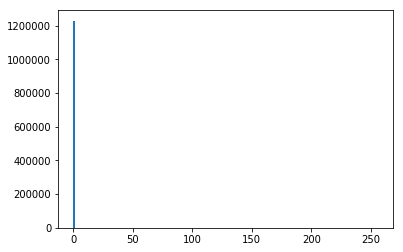

In [323]:
plt.hist(grayc2.flatten(), 256, range=(0,256));

## 21. display the relevant histograms of the channels in the HSV image

In [325]:
h=hsv_c2[:,:,0]
s=hsv_c2[:,:,1]
v=hsv_c2[:,:,2]

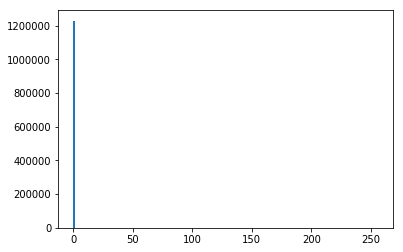

In [326]:
plt.hist(h.flatten(), 256, range=(0,256));

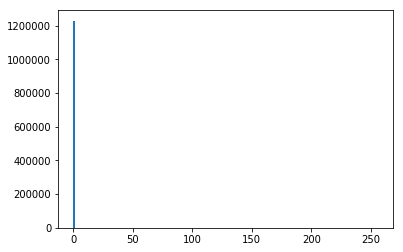

In [327]:
plt.hist(s.flatten(), 256, range=(0,256));

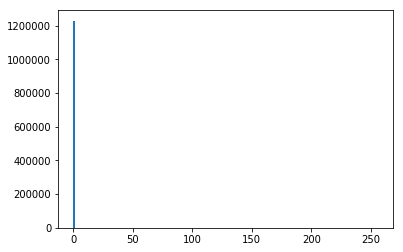

In [328]:
plt.hist(v.flatten(), 256, range=(0,256));

# Bonus

## 1. Perform a contrast stretch of the image.

In [330]:
p2, p98 = np.percentile(c2, (2, 98))
img_rescale = skimage.exposure.rescale_intensity(c2, in_range=(p2, p98))

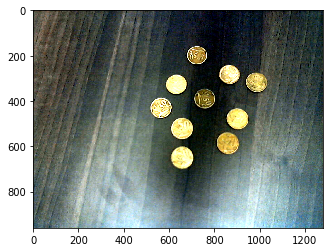

In [331]:
see(img_rescale)

## 2. Perform a histogram equalisation of the image.

/home/avi/anaconda3/lib/python3.7/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


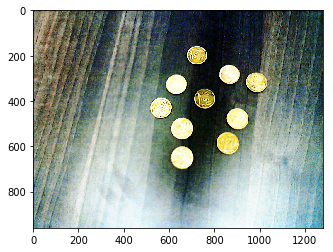

In [334]:
img_eq = skimage.exposure.equalize_hist(c2)
see(img_eq)

## See how the histograms for greyscale and HSV are affected by the above operations. How are the mean and variance of the different pixels affected by the operations above?

## Contrast Stretch:

### HSV

In [342]:
hsv_cs=skimage.color.rgb2hsv(img_rescale)

h2=hsv_cs[:,:,0]
s2=hsv_cs[:,:,1]
v2=hsv_cs[:,:,2]

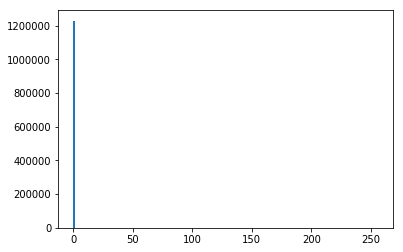

In [343]:
plt.hist(h2.flatten(), 256, range=(0,256));

# MEH